In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('./data/train.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data_train = data_train.drop(["Name"], axis = 1)

In [6]:
#data_train["Ticket"].unique()

In [7]:
data_train = data_train.drop(["Ticket"], axis = 1)

In [8]:
#data_train["Cabin"].unique()

In [9]:
data_train = data_train.drop(["Cabin"], axis = 1)

In [10]:
#data_train["Embarked"].unique()

In [11]:
data_train = data_train.drop(["Embarked"], axis = 1)

In [12]:
data_train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250


In [13]:
cat_columns = data_train.select_dtypes(['object']).columns
print(cat_columns)

Index(['Sex'], dtype='object')


In [14]:
data_train[cat_columns] = data_train.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')

In [15]:
#data_train.select_dtypes(['object'])

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: category(1), float64(2), int64(5)
memory usage: 49.8 KB


In [17]:
data_train[cat_columns]= data_train[cat_columns].apply(lambda x: x.cat.codes)

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int8
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), int8(1)
memory usage: 49.7 KB


29.69911764705882


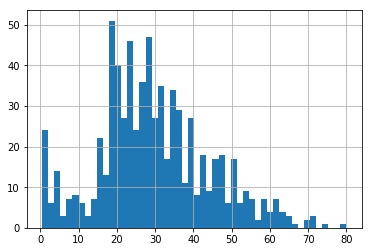

In [19]:
data_train["Age"].hist(bins = 50)
mean = data_train["Age"].mean()
print(mean)

In [20]:
data_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [21]:
index = data_train['Age'].index[data_train['Age'].apply(np.isnan)]
data_train['Age'][index] = mean # how does it work?

c:\users\nuclear\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
data_train = data_train.drop(["PassengerId"],axis = 1)

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int8
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 42.7 KB


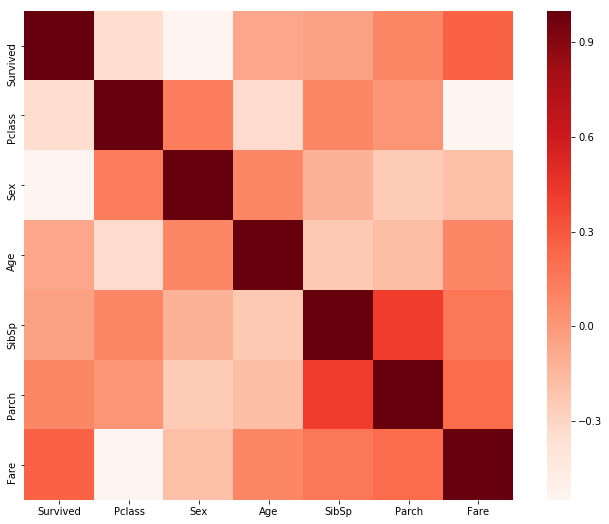

In [24]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap="Reds");

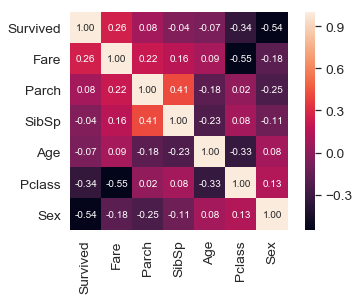

In [25]:
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [26]:
labels_train = data_train["Survived"]
data_train = data_train.drop(["Survived"],axis = 1)

In [27]:
data_tr_np = data_train.values

In [28]:
print(data_tr_np.shape)

(891, 6)


In [29]:
labels_tr_np = labels_train.values
print(labels_tr_np.shape)

(891,)


# Model

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
model = keras.Sequential()
#model.add(keras.layers.Dense(30, activation = tf.nn.relu))
model.add(keras.layers.Dense(10, activation = tf.nn.sigmoid, input_shape=(6,), name = "Dense_1"))
model.add(keras.layers.Dense(5, activation = tf.nn.sigmoid, name = "Dense_2"))
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid, name = "Dense_3"))

In [32]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
Dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
Dense_3 (Dense)              (None, 1)                 6         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(data_tr_np, labels_tr_np, epochs=300)

Epoch 1/300
891/891 [==============================] - 0s 239us/step - loss: 0.7065 - acc: 0.3838
Epoch 2/300
891/891 [==============================] - 0s 26us/step - loss: 0.6813 - acc: 0.6510
Epoch 3/300
891/891 [==============================] - 0s 53us/step - loss: 0.6681 - acc: 0.6195
Epoch 4/300
891/891 [==============================] - 0s 40us/step - loss: 0.6597 - acc: 0.6162
Epoch 5/300
891/891 [==============================] - 0s 31us/step - loss: 0.6550 - acc: 0.6162
Epoch 6/300
891/891 [==============================] - 0s 30us/step - loss: 0.6513 - acc: 0.6162
Epoch 7/300
891/891 [==============================] - 0s 38us/step - loss: 0.6484 - acc: 0.6162
Epoch 8/300
891/891 [==============================] - 0s 48us/step - loss: 0.6457 - acc: 0.6162
Epoch 9/300
891/891 [==============================] - 0s 36us/step - loss: 0.6432 - acc: 0.6207
Epoch 10/300
891/891 [==============================] - 0s 37us/step - loss: 0.6401 - acc: 0.6263
Epoch 11/300
891/891 [======

891/891 [==============================] - 0s 29us/step - loss: 0.4510 - acc: 0.8081
Epoch 85/300
891/891 [==============================] - 0s 23us/step - loss: 0.4493 - acc: 0.8047
Epoch 86/300
891/891 [==============================] - 0s 26us/step - loss: 0.4469 - acc: 0.8025
Epoch 87/300
891/891 [==============================] - 0s 18us/step - loss: 0.4470 - acc: 0.8058
Epoch 88/300
891/891 [==============================] - 0s 20us/step - loss: 0.4443 - acc: 0.8047
Epoch 89/300
891/891 [==============================] - 0s 43us/step - loss: 0.4452 - acc: 0.7969
Epoch 90/300
891/891 [==============================] - 0s 27us/step - loss: 0.4440 - acc: 0.8114
Epoch 91/300
891/891 [==============================] - 0s 25us/step - loss: 0.4427 - acc: 0.8126
Epoch 92/300
891/891 [==============================] - 0s 43us/step - loss: 0.4407 - acc: 0.8058
Epoch 93/300
891/891 [==============================] - 0s 35us/step - loss: 0.4399 - acc: 0.8148
Epoch 94/300
891/891 [===========

891/891 [==============================] - 0s 32us/step - loss: 0.4131 - acc: 0.8260
Epoch 167/300
891/891 [==============================] - 0s 40us/step - loss: 0.4118 - acc: 0.8328
Epoch 168/300
891/891 [==============================] - 0s 30us/step - loss: 0.4117 - acc: 0.8316
Epoch 169/300
891/891 [==============================] - 0s 39us/step - loss: 0.4116 - acc: 0.8305
Epoch 170/300
891/891 [==============================] - 0s 19us/step - loss: 0.4116 - acc: 0.8339
Epoch 171/300
891/891 [==============================] - 0s 28us/step - loss: 0.4128 - acc: 0.8272
Epoch 172/300
891/891 [==============================] - 0s 47us/step - loss: 0.4129 - acc: 0.8316
Epoch 173/300
891/891 [==============================] - 0s 35us/step - loss: 0.4116 - acc: 0.8294
Epoch 174/300
891/891 [==============================] - 0s 30us/step - loss: 0.4109 - acc: 0.8361
Epoch 175/300
891/891 [==============================] - 0s 30us/step - loss: 0.4102 - acc: 0.8350
Epoch 176/300
891/891 [=

891/891 [==============================] - 0s 24us/step - loss: 0.4029 - acc: 0.8350
Epoch 248/300
891/891 [==============================] - 0s 27us/step - loss: 0.4042 - acc: 0.8339
Epoch 249/300
891/891 [==============================] - 0s 35us/step - loss: 0.4035 - acc: 0.8361
Epoch 250/300
891/891 [==============================] - 0s 37us/step - loss: 0.4033 - acc: 0.8339
Epoch 251/300
891/891 [==============================] - 0s 27us/step - loss: 0.4027 - acc: 0.8328
Epoch 252/300
891/891 [==============================] - 0s 38us/step - loss: 0.4031 - acc: 0.8361
Epoch 253/300
891/891 [==============================] - 0s 23us/step - loss: 0.4043 - acc: 0.8305
Epoch 254/300
891/891 [==============================] - 0s 33us/step - loss: 0.4028 - acc: 0.8328
Epoch 255/300
891/891 [==============================] - 0s 37us/step - loss: 0.4023 - acc: 0.8339
Epoch 256/300
891/891 [==============================] - 0s 29us/step - loss: 0.4040 - acc: 0.8339
Epoch 257/300
891/891 [=

In [35]:
data_test = pd.read_csv('./data/test.csv')

In [36]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
Id = data_test["PassengerId"]

In [38]:
data_test = data_test.drop(["Name"], axis = 1)

In [39]:
data_test = data_test.drop(["Ticket"], axis = 1)

In [40]:
data_test = data_test.drop(["Cabin"], axis = 1)

In [41]:
data_test = data_test.drop(["Embarked"], axis = 1)

In [42]:
cat_columns = data_test.select_dtypes(['object']).columns
print(cat_columns)

Index(['Sex'], dtype='object')


In [43]:
data_test[cat_columns] = data_test.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')

In [44]:
data_test[cat_columns]= data_test[cat_columns].apply(lambda x: x.cat.codes)

29.69911764705882


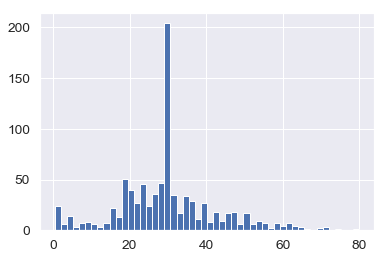

In [45]:
data_train["Age"].hist(bins = 50)
mean = data_train["Age"].mean()
print(mean)

In [46]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int8
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 20.1 KB


In [47]:
index = data_test['Age'].index[data_test['Age'].apply(np.isnan)]
data_test['Age'][index] = mean # or data_test['Age'][index] = mean 

c:\users\nuclear\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
data_test = data_test.drop(["PassengerId"],axis = 1)

In [49]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null int8
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
dtypes: float64(2), int64(3), int8(1)
memory usage: 16.8 KB


In [63]:
#index = data_test["Fare"].index[data_test["Fare"].apply(np.isnan)]
mean = data_train["Fare"].mean()
data_test["Fare"][152] =  mean#???
#print(data_train["Fare"])
#np.where(pd.isnull(data_train))
#np.where(data.applymap(lambda x: x == ''))

c:\users\nuclear\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
data_tr_np = data_test.values

In [65]:
print(data_tr_np.shape)

(418, 6)


In [66]:
predictions = model.predict(data_tr_np)

In [67]:
print(predictions.shape)

(418, 1)


In [68]:
predictions.reshape(418,)

array([0.08530898, 0.35210976, 0.08097004, 0.1027159 , 0.46344   ,
       0.19290963, 0.53940976, 0.15646729, 0.6949773 , 0.10082626,
       0.09537736, 0.26183742, 0.9645251 , 0.11692351, 0.97641903,
       0.9116437 , 0.09524207, 0.12986618, 0.3786125 , 0.44888496,
       0.41305253, 0.4011787 , 0.9694949 , 0.3737398 , 0.90409   ,
       0.07242616, 0.9535953 , 0.12214526, 0.3272545 , 0.08897401,
       0.12873141, 0.14775011, 0.3004485 , 0.3054873 , 0.35492018,
       0.14513148, 0.5536277 , 0.66932434, 0.10935211, 0.33304432,
       0.09749726, 0.30468073, 0.07729463, 0.8881615 , 0.9756718 ,
       0.11060829, 0.31447744, 0.09548862, 0.9802005 , 0.4652181 ,
       0.37646845, 0.1287309 , 0.48929235, 0.8553539 , 0.12600876,
       0.09203753, 0.08446851, 0.11085315, 0.08416535, 0.9602892 ,
       0.15698478, 0.10542647, 0.14898613, 0.6423076 , 0.95102733,
       0.93617254, 0.70089436, 0.3915085 , 0.31849545, 0.90338886,
       0.6151388 , 0.12961173, 0.5577035 , 0.31439775, 0.96467

In [69]:
pred = np.where(predictions > 0.5, 1, 0)
pred.shape
Id = np.array([Id])
Id = Id.reshape(418,1)

In [70]:
data_np = np.concatenate((Id, pred), axis = 1)

In [71]:
#print(data_np.shape, data_np)

In [72]:
out_data =  pd.DataFrame({'PassengerId' : data_np[:,0].tolist(),'Survived' : data_np[:,1].tolist() })

In [73]:
print(out_data)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3

In [74]:
out_data.to_csv("test_.csv", sep=',', encoding='utf-8', index = False)